<a href="https://colab.research.google.com/github/frankodzia/ai-course-gp/blob/main/lekcja_14_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [ ]:
df = sns.load_dataset('titanic')
print(df.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [ ]:
print("Before cleaning", len(df))
print(df.isnull().sum())

Before cleaning 891
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
df = df.dropna(subset=['age'])
print("After cleaning", len(df))
print(df.isnull().sum())

After cleaning 714
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
def categorize_fare(fare, fare_ranges):
  if fare <= fare_ranges[0]:
    return 0
  elif fare <= fare_ranges[1]:
    return 1
  else:
    return 2

min_fare = df['fare'].min()
max_fare = df['fare'].max()
print(min_fare)
print(max_fare)

fare_step = (max_fare - min_fare) / 3

fare_ranges = [min_fare + fare_step, min_fare + 2 * fare_step]
print(fare_ranges)
#print("\nPrzedziały cenowe biletów:")
#print(f"Niska: {min_fare:.2f} - {fare_ranges[0]:.2f}")
#print(f"Średnia: {fare_ranges[0]:.2f} - {fare_ranges[1]:.2f}")
#print(f"Wysoka: {fare_ranges[1]:.2f} - {max_fare:.2f}")

0.0
512.3292
[170.7764, 341.5528]


In [ ]:
selected_features = ['sex','pclass','age','fare_category']
#selected_features = ['sex','pclass','age','selected_features']

df_model = df.copy()
df_model['sex'] = df_model['sex'].map({'male': 0,'female': 1})
df_model['fare_category'] = df_model['fare'].apply(lambda x: categorize_fare(x, fare_ranges))

In [ ]:
X = df_model[selected_features]
Y = df_model['survived']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=55)
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(
    random_state = 50,
    C = 0.3
)

model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test,Y_pred)

print(accuracy)

conf_matrix = confusion_matrix(Y_test, Y_pred, normalize='true')
print(classification_report(Y_test,Y_pred))



0.7902097902097902
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        87
           1       0.73      0.73      0.73        56

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



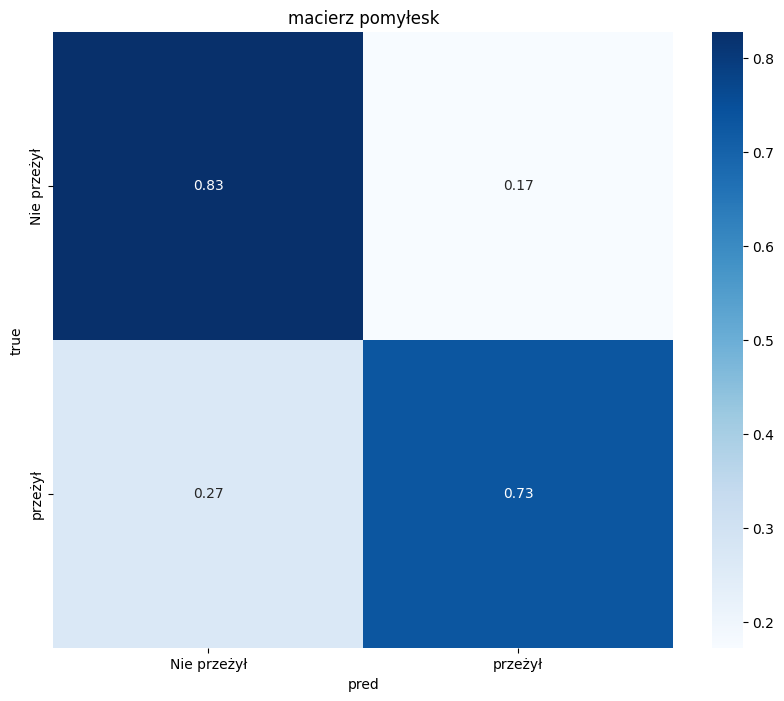

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(
    conf_matrix,
    annot=True,
    xticklabels=['Nie przeżył','przeżył'],
    yticklabels=['Nie przeżył','przeżył'],
    cmap='Blues'

    )

plt.title('macierz pomyłesk')
plt.xlabel('pred')
plt.ylabel('true')
plt.show()

In [ ]:
while True:
    print("\nPrognoza przeżycia dla nowego pasażera")
    print("(Wpisz 'koniec' w dowolnym momencie, aby zakończyć)")

    try:
        # --- PŁEĆ ---
        sex_input = input("\nPodaj płeć (m/k): ").lower()
        if sex_input == 'koniec':
            break
        if sex_input not in ['m', 'k']:
            print("Błąd: wpisz 'm' (mężczyzna) lub 'k' (kobieta).")
            continue
        sex = 1 if sex_input == 'k' else 0

        # --- KLASA ---
        pclass_input = input("Podaj klasę (1/2/3): ")
        if pclass_input == 'koniec':
            break
        pclass = int(pclass_input)
        if pclass not in [1, 2, 3]:
            print("Błąd: klasa musi być 1, 2 lub 3.")
            continue

        # --- WIEK ---
        age_input = input("Podaj wiek: ")
        if age_input == 'koniec':
            break
        age = float(age_input)
        if age <= 0:
            print("Błąd: wiek musi być dodatni.")
            continue

        # --- CENA BILETU (użyjemy categorize_fare jak przy tworzeniu df_model) ---
        print("\nPrzedziały cenowe biletów (na podstawie danych):")
        print(f"Niska:   {min_fare:.2f} - {fare_ranges[0]:.2f}")
        print(f"Średnia: {fare_ranges[0]:.2f} - {fare_ranges[1]:.2f}")
        print(f"Wysoka:  {fare_ranges[1]:.2f} - {max_fare:.2f}")

        fare_input = input("\nPodaj cenę biletu (liczba): ")
        if fare_input == 'koniec':
            break
        fare = float(fare_input)

        # ta sama logika, co w df_model['fare_category']
        fare_category = categorize_fare(fare, fare_ranges)

        # --- KONSTRUKCJA DANYCH W TEJ SAMEJ POSTACI CO X ---
        new_passenger = pd.DataFrame([{
            'sex': sex,
            'pclass': pclass,
            'age': age,
            'fare_category': fare_category
        }])[selected_features]  # zachowujemy dokładnie tę samą kolejność kolumn

        # --- SKALOWANIE I PREDYKCJA ---
        new_passenger_scaled = scaler.transform(new_passenger)
        prediction = model.predict(new_passenger_scaled)
        probability = model.predict_proba(new_passenger_scaled)

        # --- WYNIKI ---
        print("\nWyniki prognozy:")
        print(f"Płeć: {'Kobieta' if sex == 1 else 'Mężczyzna'}")
        print(f"Klasa: {pclass}")
        print(f"Wiek: {age}")
        print(
            "Kategoria cenowa: "
            f"{'Niska' if fare_category == 0 else 'Średnia' if fare_category == 1 else 'Wysoka'}"
        )
        print(f"Przewidywanie przeżycia: {'Tak' if prediction[0] == 1 else 'Nie'}")
        print(f"Prawdopodobieństwo przeżycia: {probability[0][1]:.2%}")

    except ValueError:
        print("\nBłąd: wprowadź poprawne wartości numeryczne!")
    except Exception as e:
        print(f"\nWystąpił błąd: {e}")

    kontynuuj = input("\nCzy chcesz sprawdzić kolejnego pasażera? (t/n): ").lower()
    if kontynuuj != 't':
        break

print("\nKoniec programu")


Prognoza przeżycia dla nowego pasażera
(Wpisz 'koniec' w dowolnym momencie, aby zakończyć)

Podaj płeć (m/k): m
Podaj klasę (1/2/3): 1
Podaj wiek: 40

Przedziały cenowe biletów (na podstawie danych):
Niska:   0.00 - 170.78
Średnia: 170.78 - 341.55
Wysoka:  341.55 - 512.33

Podaj cenę biletu (liczba): 140

Wyniki prognozy:
Płeć: Mężczyzna
Klasa: 1
Wiek: 40.0
Kategoria cenowa: Niska
Przewidywanie przeżycia: Nie
Prawdopodobieństwo przeżycia: 42.54%

Czy chcesz sprawdzić kolejnego pasażera? (t/n): n

Koniec programu
